# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [135]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [136]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [137]:
print('The number of rows in the dataset =', df.shape[0])

The number of rows in the dataset = 294478


**c.** The number of unique users in the dataset.

In [138]:
print('The number of users in the dataset = ', df['user_id'].nunique())

The number of users in the dataset =  290584


**d.** The proportion of users converted.

In [139]:
proportion = (len(df.query('converted == 1')) / len(df.index)) * 100
print('The proportion of users converted =',"{:.4f}".format(proportion),'%')

The proportion of users converted = 11.9659 %


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [140]:
group_page_not_inline = len(df.query("group == 'treatment' & landing_page != 'new_page'")) + len(df.query("group == 'control' & landing_page != 'old_page'"))
print('The number of times when the group is not inline with the landing page =', group_page_not_inline)

The number of times when the group is not inline with the landing page = 3893


**f.** Do any of the rows have missing values?
No.

In [141]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [142]:
# Remove the inaccurate rows, and store the result in a new dataframe 
df2 = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page') | (df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]

In [143]:
# Double Check all of the incorrect rows were removed from df2 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [144]:
print('The number of unique user_ids =', df2['user_id'].nunique())

The number of unique user_ids = 290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [145]:
duplicated_id = df2[df2.duplicated(['user_id'])]
print('The user_id repeated is', duplicated_id['user_id'].unique())

The user_id repeated is [773192]


**c.** Display the rows for the duplicate **user_id**? 

In [146]:
df2[df2.duplicated(['user_id'], keep= False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [147]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(labels = 1899, axis = 0, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [148]:
# Check again if the row with a duplicate user_id is deleted or not
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>




In [149]:
p_population = df2['converted'].mean() 
p_population_percentage = p_population * 100
print('The probability of an individual converting regardless of page received =', "{:.4f}".format(p_population_percentage),'%')

The probability of an individual converting regardless of page received = 11.9597 %


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [150]:
control_converted = (df2.query("group == 'control'")['converted']).mean() 
control_converted_percentage = control_converted * 100
print('The probabilty of individuals in the control group who converted', "{:.4f}".format(control_converted_percentage),'%')

The probabilty of individuals in the control group who converted 12.0386 %


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [151]:
treatment_converted = (df2.query("group == 'treatment'")['converted']).mean() 
treatment_converted_percentage = treatment_converted * 100
print('The probability of individuals in the treatment group who converted', "{:.4f}".format(treatment_converted_percentage),'%')

The probability of individuals in the treatment group who converted 11.8808 %


>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [152]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_converted - control_converted
print('The actual difference between conversion rates for the two groups =',"{:.4f}".format(obs_diff),'%')

The actual difference between conversion rates for the two groups = -0.0016 %


**d.** What is the probability that an individual received the new page?

In [154]:
p_new_page = df2.query("landing_page == 'new_page'").count()[0] / df.shape[0]
p_new_page_percentage = p_new_page * 100
print('The probability than an individual received the new page is', "{:.4f}".format(p_new_page_percentage),'%')

The probability than an individual received the new page is 49.3449 %


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.



#### 1. Based on the above results, the treatment group has conversion rate of 11.88% and the control group has a conversion rate of 12.04%; this suggests that the new treatment group users don't lead to more conversions.


#### 2. Although the results show that the conversion rate of control group is greater than that of the treatment group, it is not statistically sufficient to conclude that the old page drives more conversions because the difference of -0.1578% is not significant.

#### 3. Aside from the difference being small, there are some factors that also need to be considered such as change aversion, novelty effect, practical signifiance, etc.

#### 4. So at this point of analysis, we can not confidently say that the old page control group users lead to more conversions. A hypothesis test is recommended to help achieve an informed decision.

#### .

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

#### **$H_0$: $p_{new}$ ≤ $p_{old}$**
#### **$H_1$: $p_{new}$ > $p_{old}$**


### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [155]:
p_new = df2['converted'].mean() 
p_new_percentage = p_new * 100
print('The conversion rate for p_new under the null hypothesis is', "{:.4f}".format(p_new_percentage),'%')

The conversion rate for p_new under the null hypothesis is 11.9597 %


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [156]:
p_old = df2['converted'].mean()
p_old_percentage = p_old * 100
print('The conversion rate for p_old under the null hypothesis is', "{:.4f}".format(p_old_percentage),'%')

The conversion rate for p_old under the null hypothesis is 11.9597 %


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [157]:
n_new = df2['landing_page'].value_counts()[0]
print('The number of individuals in the treatment group =', n_new)
# 145310

The number of individuals in the treatment group = 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [158]:
n_old = df2['landing_page'].value_counts()[1]
print('The number of individuals in the control group =', n_old)

The number of individuals in the control group = 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [159]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], size = n_new, p = [1-p_new, p_new])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [160]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size = n_old, p = [1-p_old, p_old])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [161]:
diff_mean = (new_page_converted.mean() - old_page_converted.mean())
diff_mean_percentage = diff_mean * 100
print('The difference in the converted probability for simulated samples =', "{:.4f}".format(diff_mean_percentage),'%')

The difference in the converted probability for simulated samples = 0.1058 %



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [162]:
# Sampling distribution 
p_diffs = []
for _ in range (10000):
    new_page_converted = np.random.choice([0, 1], size = n_new, p = [1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size = n_old, p = [1-p_old, p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  



Text(0,0.5,'Simulations')

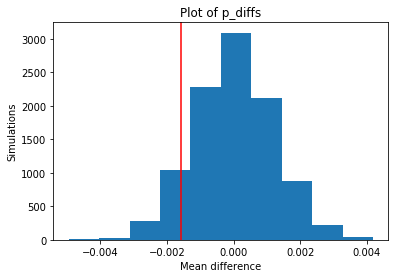

In [163]:
plt.hist(p_diffs);
plt.axvline(x = obs_diff, color = 'red')
plt.title('Plot of p_diffs')
plt.xlabel('Mean difference')
plt.ylabel('Simulations')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [164]:
p_value = (p_diffs > obs_diff).mean()
print('The proportion of the p_diffs that are greater than the actual difference observed in the df2 data =', "{:.4f}".format(p_value))


The proportion of the p_diffs that are greater than the actual difference observed in the df2 data = 0.9100


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

#### This value is called the p-value. p-values are numbers between 0 and 1 which measure the confidence we have in the H1 or alternative hypothesis which says the new page drives more conversions than the old page.
#### The closer the p-value to zero, the more confidence we have in the H1 or alternative hypothesis.
#### However, we need to set how small does the p-value have to be before we can sufficiently say that the new page drives more conversions than the old page. This means we need to have a threshold. In practice, a commonly used threshold is Type 1 error rate of 0.05. So if our p-value falls below the type 1 error rate, it suggests that we reject the H0 or null hypothesis. That is, we choose the H1 or alternative hypothesis. Consequently if our p-value is above the threshold error rate, then we fail to reject the H0 or null hypothesis. 
#### Given that no study or experiment is perfect and that random things can aways happen, the setting of threshold of 0.05 means we would only get a 5 False Positive out of 100 experiments. Getting a small p-value when the null is true is also called False Positive or the type 1 error.
#### So, our p-value is 0.9100, which is greater than 0.05. This means that we are not confident to reject the null so we stay with the null hypothesis as our decision. That is, we are confident to say that the new page does not drive more conversions than the old page.




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [166]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("landing_page == 'old_page' & converted == '1'").count()[0]

# number of conversions with the new_page
convert_new = df2.query("landing_page == 'new_page' & converted == '1'").count()[0]

# number of individuals who were shown the old_page
n_old = df2['landing_page'].value_counts()[1]

# number of individuals who received new_page
n_new = df2['landing_page'].value_counts()[0]

print('The number of conversions with old page and new page respectively:', convert_old, '&', convert_new) 
print('The number of individuals who were shown the old page and new page respectively:', n_old, '&', n_new)    


The number of conversions with old page and new page respectively: 17489 & 17264
The number of individuals who were shown the old page and new page respectively: 145274 & 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [167]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
print('z_score =',"{:.4f}".format(z_score))
print('p_value =',"{:.4f}".format(p_value))


z_score = -1.3109
p_value = 0.9051


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

#### In order to make a decision to reject or fail to reject the null hypothesis, we need to compare the two values of z_score and 𝑍𝛼. 
#### We defined 𝐻1 : 𝑝𝑛𝑒𝑤 > 𝑝𝑜𝑙𝑑 therefore, it is a right-tailed z test which is a one-tailed test. 𝑍𝛼 or $Z_{0.05}$, also known as critical value at 95% confidence interval is 1.645 for one-tailed tests.
#### For a right-tailed test, we reject the null hypothesis if z_𝑠𝑐𝑜𝑟𝑒  > 𝑍𝛼. Our z_score is -1.3109 which is less than 𝑍𝛼 of 1.645.
#### Therefore, based on this result, we are not confident to reject the null hypothesis.
#### The p-value in part j is 0.9100 and the p-value using the built-in function is 0.9051. The two p-values have a small difference difference but statistically speaking, they agree with the findings in part j. p-value remains greater than the 0.05 threshold and therefore we are not confident to reject the null hypothesis.
#### Considering the results of z_score and p-value using the built-in function, we are not confident to reject the null hypothesis same as our findings in part k.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**In this case, logistic regression will be performed as it bounds our response to a probability between zero and 1.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [168]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [169]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 7 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
dtypes: int64(3), object(3), uint8(1)
memory usage: 15.8+ MB


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [170]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [171]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-12 23:37 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [122]:
# exponentiate the coefficient for ab_page
np.exp(-0.0150)

0.98511193960306265

In [123]:
# compute the reciprocal since we get multiplicative changes less than 1
1/np.exp(-0.0150)

1.0151130646157189

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

#### The results shows our coefficient for ab_page is -0.0150. In order to interpret it,  we need to exponentiate it. So we get the value of around 0.9851 which is less than 1. When multiplicative changes are less than 1, it is usually useful to calculate the reciprocal. 

#### Now, our value is around 1.0151. So, the result for ab_page can be interpreted as: The new page received by the treatment group drives 1.0151 times less conversions than the old page received by the control group, holding all other variables constant or the individuals in the treatment group converts 1.0151 times less likely than the individuals in the control group, holding all other variables constant.

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


#### The p-value associated with ab_page is 0.1899. The p-value in part II is 0.9100. It is different than the p-value in Part II because were are testing different hypotheses.

#### The hypothesis associated with the regression model is a two-tailed test with null & alternative hypotheses below:
#### **$H_0$: $p_{new}$ = $p_{old}$**
#### **$H_1$: $p_{new}$ ≠ $p_{old}$**

#### The hypothesis we did earlier in Part II is right-tailed which is one of the one-tailed tests with the null & alternative hypotheses below :
#### **$H_0$: $p_{new}$ ≤ $p_{old}$**
#### **$H_1$: $p_{new}$ > $p_{old}$**

#### The p-value we got from the Logit regression model remains greater than the Type 1 error rate of 0.05 threshold and therefore we are not confident to reject the null hypothesis.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

#### Other factors that can be cosidered that might influence the conversion rate are age and location (city, country-side, country) of the individual. 

#### Old-age people like those who are 60+ years are not very much comfortable using the internet and websites. Most of them prefer traditional shopping from the physical store where there is human interaction and where they can check the items face to face. Whereas the younger people, they are more proficient with internet usage and they enjoy the comfort of online shopping. 

#### Location can also be a factor. If you live in the city where shopping centers are everywhere and in close proximity, you might not need to do online shopping regularly, maybe on an urgent needs only. But if you live far from the city, you might find online shopping more efficient than driving all the way to the city just to buy one item of clothing or toy. 

#### Country can also be a factor. Some countries have a very good internet connection, IT security and huge e-commerce presence country-wide. Countries where majority of citizens are above average and rich tend to use e-commerce more. The old and new pages might also behave differently from country to country.

#### It is a good idea to consider these factors to add into the regression model in order to have a more informed decision and avoid the likelihood of getting misguided decision.

#### The disadvantages of adding additional factors into regression model could be the additional costs and time the test would need especially if the data is not readily available.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [172]:
# Read the countries.csv
df_countries = pd.read_csv('countries.csv')
df_countries.groupby('country').count()

,user_id
country,
CA,14499
UK,72466
US,203619


In [173]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [174]:
# Join with the df2 dataframe
df_merged = df_countries.set_index('user_id').join(df2.set_index('user_id'))
df_merged.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [175]:
df_merged.isnull().sum()

country         0
timestamp       0
group           0
landing_page    0
converted       0
intercept       0
ab_page         0
dtype: int64

In [176]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 7 columns):
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
dtypes: int64(2), object(4), uint8(1)
memory usage: 25.8+ MB


In [177]:
# Create the necessary dummy variables
df_merged[['US', 'UK', 'CA']] = pd.get_dummies(df_merged['country'])[['US', 'UK', 'CA']]

In [181]:
#Does it appear that country had an impact on conversion? 
#Provide the statistical output as well as a written response to answer this question.
US_converted = (df_merged.query("US == '1'")['converted']).mean()
UK_converted = (df_merged.query("UK == '1'")['converted']).mean()
CA_converted = (df_merged.query("CA == '1'")['converted']).mean()
print('The proportions of individuals who converted in the US, UK and CA are',"{:.4f}".format(US_converted),',',"{:.4f}".format(UK_converted),'and '"{:.4f}".format(CA_converted), 'respectively')


The proportions of individuals who converted in the US, UK and CA are 0.1195 , 0.1206 and 0.1153 respectively


#### To answer the question, "Does it appear that country had an impact on conversion?  
#### The conversion rates of each country US = 11.95, UK = 12.06 and CA = 11.53 show that the country does not affect the conversion as the proportions are all approximately the same.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [182]:
# Fit your model, and summarize the results
log_mod2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'UK']])
results2 = log_mod2.fit()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [183]:
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-12 23:48 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

In [184]:
np.exp(results2.params)

intercept    0.131332
ab_page      0.985168
US           1.041599
UK           1.051944
dtype: float64

#### After considering the countries US, UK and CA into the regression model and based on the results, this can be interpreted as:
##### If the costumer is in the US, it is 1.04 times as likely to convert or to actually buy the product than the individuals in other countries, holding all other varibles constant. Consequently, if the costumer is in the UK, it is 1.05 times as likely to convert.

#### The p- value for the US is 0.1295 which is higher than the type 1 error rate of 0.05; the p-value for UK is 0.0745 which is also higher than the threshold. This suggests that we are not confident to reject the null hypothesis.

#### Based on the available data and the results of all the tests done (probability, hypothesis, z-test and regression), the indication remains that we fail to reject the null hypothesis. That is the new page does not drive more conversions than the old page.

#### Therefore, we recommend that the e-commerce company keep the old page for the time being. As for the new page, since it has already been created for testing purposes, this can be updated or upgraded and re-run another tests after sometime. This can save time and money on the part of company rather than to launch a new page  which will cost them for the implementation but without significant increase in revenues.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [185]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0